# Distributions of nodes and edges in Custom KG and OpenBioLink KG

This notebook plots the distributions of nodes and edges in the Custom KG and OpenBioLink KG.

In [1]:
import os
import getpass
import sys
import time

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from utils import KG_DATA_PATH

In [2]:
getpass.getuser()

'yojana'

In [3]:
sys.version

'3.8.5 (default, Sep  4 2020, 02:22:02) \n[Clang 10.0.0 ]'

In [4]:
time.asctime()

'Fri Mar 19 18:09:47 2021'

Load networks

In [5]:
custom = pd.read_csv(
    os.path.join(KG_DATA_PATH, 'normalized', 'custom_kg_normalized.tsv'), 
    sep='\t'
)
openbiolink = pd.read_csv(
    os.path.join(KG_DATA_PATH, 'normalized', 'openbiolink_kg_normalized.tsv'), 
    sep='\t'
)

### Get nodes in Custom KG

Remove duplicate nodes in source ID and target ID columns 

In [6]:
source_identifier = custom['source']
target_identifier = custom['target']

custom_network_nodes = pd.concat([source_identifier, target_identifier], ignore_index=True)

duplicates_count_custom = 0
for index, duplicate in (custom_network_nodes.duplicated()).iteritems():
    if duplicate == True:
        duplicates_count_custom += 1
        
unique_nodes_custom_network = custom_network_nodes.drop_duplicates()

Get entity counts for unique nodes

In [7]:
custom_drugs = 0
custom_proteins = 0
custom_diseases = 0

for _, entity in unique_nodes_custom_network.iteritems():
    if entity.startswith('pubchem.compound:'):
        custom_drugs += 1
    elif entity.startswith('ncbigene:'):
        custom_proteins += 1
    elif entity.startswith('mondo:'):
        custom_diseases += 1
    else:
        raise ValueError(f'{entity} not a PubChem, NCBI, or MONDO.')  

### Get edges in custom network 

#### Edges in dataset:
1. drugs (DrugBank ID) and genes (HGNC symbol)
2. genes (HGNC symbol) and genes (HGNC symbol)
3. genes (HGNC symbol) and disease/phenotypes (UMLS concept ID)

In [8]:
drug_protein_df = custom.loc[
    (custom['source'].str.startswith('pubchem.compound:')) & 
    (custom['target'].str.startswith('ncbigene:'))]

protein_protein_df = custom.loc[
    (custom['source'].str.startswith('ncbigene:')) & 
    (custom['target'].str.startswith('ncbigene:'))]

protein_disease_df = custom.loc[
    (custom['source'].str.startswith('ncbigene:')) & 
    (custom['target'].str.startswith('mondo:'))]

Get unique disease and phenotype nodes and edges in custom network

In [9]:
drug_protein_custom = len(drug_protein_df.index)
protein_protein_custom = len(protein_protein_df.index)
protein_disease_custom = len(protein_disease_df.index)

In [10]:
print('##### Number of nodes in Custom kg #####')
print(f'{custom_network_nodes.size}: total # of nodes')
print(f'{duplicates_count_custom}: # of duplicate nodes')
print(f'{unique_nodes_custom_network.size}: # of unique nodes')
print(f'{custom_drugs}: # of unique drugs')
print(f'{custom_proteins}: # of unique proteins')
print(f'{custom_diseases}: # of unique diseases')

print('\n##### Number of edges in Custom kg ######')       
print(f'{len(custom.index)}: total # of interactions')
print(f'{drug_protein_custom}: # of drug-protein interactions')
print(f'{protein_protein_custom}: # of protein-protein interactions')
print(f'{protein_disease_custom}: # of protein-disease interactions')

##### Number of nodes in Custom kg #####
104364: total # of nodes
95729: # of duplicate nodes
8635: # of unique nodes
323: # of unique drugs
8253: # of unique proteins
59: # of unique diseases

##### Number of edges in Custom kg ######
52182: total # of interactions
1161: # of drug-protein interactions
50673: # of protein-protein interactions
348: # of protein-disease interactions


### Get nodes in OpenBioLink KG

Remove duplicate nodes in source and target columns 

In [11]:
source = openbiolink['source']
target = openbiolink['target']

openbiolink_nodes = pd.concat([source, target], ignore_index=True)

duplicates_count_openbiolink = 0
for index, duplicate in (openbiolink_nodes.duplicated()).iteritems():
    if duplicate == True:
        duplicates_count_openbiolink += 1
        
unique_nodes_openbiolink = openbiolink_nodes.drop_duplicates()

Get entity counts for unique nodes

In [12]:
openbiolink_drugs = 0
openbiolink_proteins = 0
openbiolink_diseases = 0

for _, entity in unique_nodes_openbiolink.iteritems():
    if entity.startswith('pubchem.compound:'):
        openbiolink_drugs += 1
    elif entity.startswith('ncbigene:'):
        openbiolink_proteins += 1
    elif entity.startswith('mondo:'):
        openbiolink_diseases += 1
    else:
        raise ValueError(f'{entity} not a PubChem, NCBI, or MONDO.')  


### Get edges in OpenBioLink network

#### Edges in dataset:

1. drugs (PubChem compound) and genes (NCBI gene)
2. genes (NCBI gene) and genes (NCBI gene)
3. genes (NCBI gene) and diseases (DOID)
4. genes (NCBI gene) and phenotypes (HP)

In [13]:
drug_protein_df_obl = openbiolink.loc[
    (openbiolink['source'].str.startswith('pubchem.compound:')) & 
    (openbiolink['target'].str.startswith('ncbigene:'))]

protein_protein_df_obl = openbiolink.loc[
    (openbiolink['source'].str.startswith('ncbigene:')) & 
    (openbiolink['target'].str.startswith('ncbigene:'))]

protein_disease_df_obl = openbiolink.loc[
    (openbiolink['source'].str.startswith('ncbigene:')) & 
    (openbiolink['target'].str.startswith('mondo:'))]

In [14]:
drug_protein_obl = len(drug_protein_df_obl.index)
protein_protein_obl = len(protein_protein_df_obl.index)
protein_disease_obl = len(protein_disease_df_obl.index)

In [15]:
print('##### Number of nodes in OpenBioLink KG #####')
print(f'{openbiolink_nodes.size}: total # of nodes')
print(f'{duplicates_count_openbiolink}: # of duplicate nodes')
print(f'{unique_nodes_openbiolink.size}: # of unique nodes')
print(f'{openbiolink_diseases}: # of unique diseases')
print(f'{openbiolink_drugs}: # of unique drugs')
print(f'{openbiolink_proteins}: # of unique proteins \n')

print('##### Number of edges in OpenBioLink KG #####')
print(f'{len(openbiolink.index)}: total # of edges')
print(f'{drug_protein_obl}: # of drug-protein interactions')
print(f'{protein_protein_obl}: # of protein-protein interactions')
print(f'{protein_disease_obl}: # of protein-disease interactions')

##### Number of nodes in OpenBioLink KG #####
97756: total # of nodes
91635: # of duplicate nodes
6121: # of unique nodes
76: # of unique diseases
863: # of unique drugs
5182: # of unique proteins 

##### Number of edges in OpenBioLink KG #####
48878: total # of edges
9572: # of drug-protein interactions
39154: # of protein-protein interactions
152: # of protein-disease interactions


### Plot distributions of nodes in Custom KG and OpenBioLink KG

In [16]:
data_nodes = {
    'Network': ['Custom KG','OpenBioLink KG','Custom KG','OpenBioLink KG','Custom KG','OpenBioLink KG'],
    'Count':[custom_drugs, openbiolink_drugs, custom_proteins, openbiolink_proteins, custom_diseases, openbiolink_diseases],
    'Node Types':['Drugs','Drugs','Genes/Proteins','Genes/Proteins','Diseases','Diseases']
}

node_df = pd.DataFrame(data=data_nodes)

In [17]:
data_edges = {
    'Network': ['Custom KG','OpenBioLink KG','Custom KG','OpenBioLink KG','Custom KG','OpenBioLink KG'],
    'Count':[drug_protein_custom, drug_protein_obl, protein_protein_custom, protein_protein_obl, protein_disease_custom, protein_disease_obl],
    'Edge Types':['drug-protein','drug-protein','protein-protein','protein-protein','protein-disease','protein-disease']
}


edges_df = pd.DataFrame(data=data_edges)

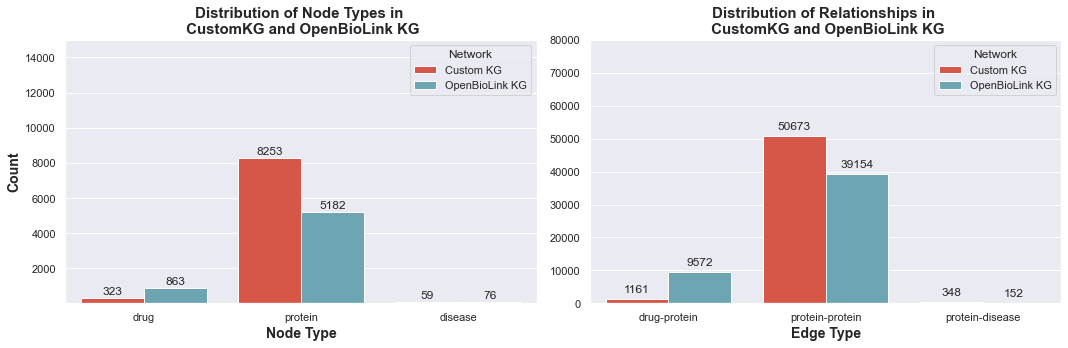

In [18]:
sns.set(rc={'figure.figsize':(15,5)})
f, axis = plt.subplots(1, 2, figsize=(15,5))

# grid lines
sns.set_style("darkgrid")

bx = sns.barplot(x="Node Types", y="Count", hue='Network', data=node_df, palette=['#EE442F','#63ACBE'], ax=axis[0]) 
bx = sns.barplot(x="Edge Types", y="Count", hue='Network', data=edges_df, palette=['#EE442F','#63ACBE'], ax=axis[1]) 

# title
axis[0].set_title(
    'Distribution of Node Types in \n CustomKG and OpenBioLink KG', 
    fontsize=15, 
    fontweight="bold"
)
axis[1].set_title(
    'Distribution of Relationships in \n CustomKG and OpenBioLink KG', 
    fontsize=15, 
    fontweight="bold"
)

# axis labels
axis[0].set_xlabel("Node Type", fontsize=14, fontweight="bold")
axis[0].set_ylabel("Count", fontsize=14, fontweight="bold")
axis[1].set_xlabel("Edge Type", fontsize=14, fontweight="bold")
axis[1].set_ylabel("")   
    
# axis ticks
axis[0].set_xticklabels(labels=['drug', 'protein', 'disease'])
axis[1].set_xticklabels(labels=['drug-protein','protein-protein','protein-disease'])

# limit
axis[0].set_ylim(10, 15000)
axis[1].set_ylim(0, 80000)

# Add counts above bars
for p in axis[0].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + 200
    value = int(p.get_height())
    axis[0].text(_x, _y, value, ha="center")
    

for p in axis[1].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + 2000
    value = int(p.get_height())
    axis[1].text(_x, _y, value, ha="center")   


plt.tight_layout()
plt.savefig(
    ('graph-stats.png'),
    dpi=400,
    bbox_inches='tight', 
)
plt.show()
    
    